In [124]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import opendatasets as od
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [3]:
# Assign the Kaggle data set URL into variable
dataset = 'https://www.kaggle.com/datasets/arshid/iris-flower-dataset'
# Using opendatasets let's download the data sets
od.download(dataset )

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rajabhi1
Your Kaggle Key: ········


100%|██████████████████████████████████████████████████████████████████████████████| 0.99k/0.99k [00:00<00:00, 995kB/s]

In [5]:
df = pd.read_csv("D:/DataAnalysis/iris-flower-dataset/IRIS.csv",index_col=False)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [119]:
df['species'] = df['species'].replace(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],[0,1,2])

In [120]:
x = df.drop(['species'],axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, train_size = 0.75)


## Initialing the centroid with best X_train example to fit the centroid

In [28]:
def findInitialCentroid(XTrain, no_of_clusters, n_iter):
#     Initial cost function
    J=200.0
    x_t = np.asarray(XTrain)
    for i in range(n_iter):
        randomRows= np.array([])
        randomRowNo = np.random.randint(low= x_t.shape[0],size=no_of_clusters)
        for j in randomRowNo: 
            b = np.reshape(x_t[j,:],(1,x_t[j,:].shape[0]))
            randomRows = np.append(randomRows,b)
        randomRows = np.reshape(randomRows , (no_of_clusters,x_t[j,:].shape[0]))
        c=0
        for a1 in range(x_t.shape[0]):
            l1=[]
            for b1 in range(no_of_clusters):
#                 calculating eculidan distance btw every row and the random samples 
                manhattanDistance = x_t[a1][:]-randomRows[b1][:]
                l1.append(np.sqrt(np.dot(manhattanDistance,manhattanDistance)))   
            c= c+min(l1)   
    #     c=np.sum((np.minimum(np.square(x_t-k[0][:]) ,np.square(x_t-k[1][:]),np.square(x_t-k[2][:]))))
        if( c < J):
            J = c
            randomRows_final = randomRows
#             print(randomRows_final,J)
    return randomRows_final    
    

## Creating the training loop after K_means centroids

In [104]:
def assignCentroid(centroid,x_t,no_of_clusters):
    #     assiginig points to cluster centroids
        clusterGroup = []
        for j in range(x_t.shape[0]):
            distance=[]
            for k in range(no_of_clusters):
                manhattanDistance = x_t[j][:]-centroid[k][:]
                distance.append(np.sqrt(np.dot(manhattanDistance,manhattanDistance)))
            clusterGroup.append(distance.index(min(distance))) 
        clusterGroup = np.array(clusterGroup)
        clusterGroup= np.reshape(clusterGroup,(clusterGroup.shape[0],1))
        return clusterGroup
    
def moveCentroid(clusterGroup, x_t, no_of_clusters):
    #     move the cluster centroid 
        k2 = []
        for n in range(no_of_clusters):
            a1 = x_t[np.where(clusterGroup[:,0] == n)].mean(axis=0)
            k2.append(a1)
        return np.array(k2) 
    
def trainLoop(epoch, XTrain, no_of_clusters):
    x_t = np.asarray(XTrain)
    centroid = findInitialCentroid(XTrain,no_of_clusters,1000)
    for i in range(epoch):
        clusterGroup = assignCentroid(centroid,x_t,no_of_clusters)
        newCentroid = moveCentroid(clusterGroup,x_t,no_of_clusters)
        if(newCentroid == centroid).all():
            print(i)
            break
        centroid = newCentroid  
    return centroid ,  clusterGroup      
    

In [108]:
centroid,groupsTrain = trainLoop(200, X_train,3)

5


In [109]:
print(centroid)

[[4.99714286 3.41428571 1.46285714 0.24285714]
 [5.81875    2.71875    4.37083333 1.43333333]
 [6.85517241 3.10344828 5.70689655 2.02068966]]


## Finding cluster group for test data

In [110]:
groupsTest = assignCentroid(centroid,np.asarray(X_test),3) 

In [122]:
accuracy_score(y_test,groupsTest)

0.9473684210526315

## Using Sklearn 

In [125]:
#Finding the optimum number of clusters for k-means classification
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\abhin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

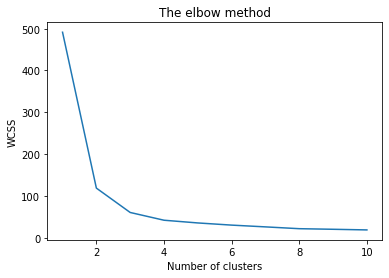

In [126]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [130]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit(X_train)

C:\Users\abhin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [131]:
yP = kmeans.predict(X_test)
accuracy_score(y_test,yP)

0.9473684210526315

## We can see by sklearn and self made libarary we are getting the the accuracy 